# OLA 3

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Finding the most relevant features

In [10]:
df = pd.read_csv("../OLA-2/data/raw/heart_2020_cleaned_transformed.csv")

correlation = df.corr()
corr_target = abs(correlation["HeartDisease"])

sorted_corr = corr_target.sort_values(ascending=False)
print(sorted_corr[:25])

HeartDisease                           1.000000
GenHealth                              0.243182
AgeCategory                            0.233432
DiffWalking                            0.201258
Stroke                                 0.196835
Diabetic                               0.174782
PhysicalHealth                         0.170721
KidneyDisease                          0.145197
Smoking                                0.107764
PhysicalActivity                       0.100030
SkinCancer                             0.093317
Sex                                    0.070040
BMI                                    0.053338
Asthma                                 0.041444
Race_White                             0.040121
Race_Hispanic                          0.036163
AlcoholDrinking                        0.032080
Race_Asian                             0.030262
MentalHealth                           0.028591
Race_Black                             0.010156
Race_American Indian/Alaskan Native    0

Elbow curve

C:\Users\chris\AppData\Local\Temp\ipykernel_3764\152279827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` w

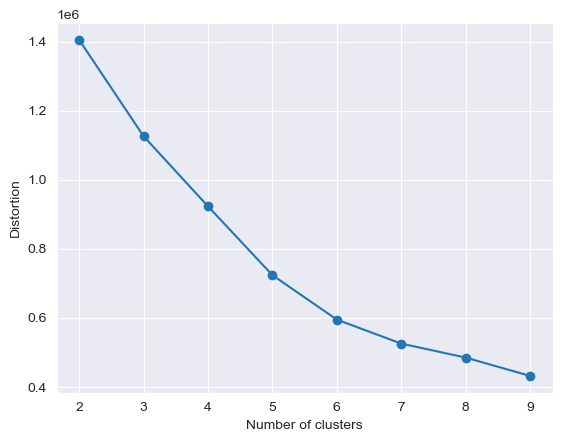

In [11]:
# The most relevant features aer: GenHealth, AgeCategory, DiffWalking, Stroke, Diabetic, PhysicalHealth
features = df[
    ["GenHealth", "AgeCategory", "DiffWalking", "Stroke", "Diabetic", "PhysicalHealth"]
]

# Handle missing values 
features.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow Method
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 10), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

Silhouette score example - we tried using silhouette for finding the best amount of clusters, but it took way too long for it to run - there is more detailed explanation later in the notebook.

In [12]:
# Silhouette Score
# k = 6  # Choose the number of clusters based on the elbow diagram
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(features_scaled)
# labels = kmeans.labels_

# score = silhouette_score(features_scaled, labels)
# print(f"Silhouette Score: {score}")

# # Silhouette Plot
# from sklearn.metrics import silhouette_samples

# silhouette_vals = silhouette_samples(features_scaled, labels)

# y_ax_lower, y_ax_upper = 0, 0
# yticks = []
# for i, c in enumerate(sorted(set(labels))):
#     c_silhouette_vals = silhouette_vals[labels == c]
#     c_silhouette_vals.sort()
#     y_ax_upper += len(c_silhouette_vals)
#     color = plt.cm.nipy_spectral(float(i) / len(set(labels)))
#     plt.barh(
#         range(y_ax_lower, y_ax_upper),
#         c_silhouette_vals,
#         height=1.0,
#         edgecolor="none",
#         color=color,
#     )
#     yticks.append((y_ax_lower + y_ax_upper) / 2.0)
#     y_ax_lower += len(c_silhouette_vals)

# silhouette_avg = np.mean(silhouette_vals)
# plt.axvline(silhouette_avg, color="red", linestyle="--")

# plt.yticks(yticks, [str(c) for c in sorted(set(labels))])
# plt.ylabel("Cluster")
# plt.xlabel("Silhouette score")
# plt.show()

# num_clusters = 6

# # Apply KMeans
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(features_scaled)

# # Get the cluster labels for each data point
# labels = kmeans.labels_

# # Add the labels to the original DataFrame
# df['cluster'] = labels

# # Print the first few rows of the DataFrame to see the cluster labels
# print(df.head())

# # Visualizing the clusters is a bit tricky when you have more than two features.
# # One common approach is to use a pairplot, which shows scatter plots for each pair of features.
# # However, this requires all features to be numerical. If you have categorical features,
# # you'll need to handle them appropriately (e.g., by using one-hot encoding).
# # Here's an example of how you might create a pairplot using seaborn:

# import seaborn as sns
# sns.pairplot(df[['GenHealth', 'AgeCategory', 'DiffWalking', 'Stroke', 'Diabetic', 'cluster']], hue='cluster')
# plt.show()

Kmeans

In [13]:
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 6

# Apply KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the labels to the original DataFrame
df["cluster"] = labels

# Print the first few rows of the DataFrame to see the cluster labels
df.head()

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,cluster
0,0,0,1,0,0,3.0,30.0,0,0,7,...,1,0,1,False,False,False,False,False,True,2
1,0,1,0,0,1,0.0,0.0,0,0,12,...,0,0,0,False,False,False,False,False,True,4
2,0,2,1,0,0,20.0,30.0,0,1,9,...,1,0,0,False,False,False,False,False,True,2
3,0,1,0,0,0,0.0,0.0,0,0,11,...,0,0,1,False,False,False,False,False,True,1
4,0,1,0,0,0,28.0,0.0,1,0,4,...,0,0,0,False,False,False,False,False,True,3


DBSCAN - same the the silhouette we have a more detailed explanation later

In [14]:
### too computational intensive
# from sklearn.cluster import DBSCAN

# # Apply DBSCAN
# # eps is the maximum distance between two samples for them to be considered as in the same neighborhood
# # min_samples is the minimum number of samples in a neighborhood for a point to be considered as a core point
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan.fit(features_scaled)

# # Get the cluster labels for each data point
# labels = dbscan.labels_

# # Add the labels to the original DataFrame
# df["cluster"] = labels

# # Print the first few rows of the DataFrame to see the cluster labels
# print(df.head())

We tried to use the results from the KMeans in order model from our previous assignment

In [15]:
# Calculate average value of each feature for each cluster
for cluster in set(labels):
    cluster_data = features[labels == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.mean())

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Add cluster labels as a new feature
df["cluster"] = labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("HeartDisease", axis=1), df["HeartDisease"], test_size=0.2, random_state=42
)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Cluster 0:
GenHealth         2.946802
AgeCategory       2.464568
DiffWalking       0.000481
Stroke            0.000000
Diabetic          0.000000
PhysicalHealth    1.024596
dtype: float64
Cluster 1:
GenHealth         2.85770
AgeCategory       8.68045
DiffWalking       0.00000
Stroke            0.00000
Diabetic          0.00000
PhysicalHealth    0.88117
dtype: float64
Cluster 2:
GenHealth         2.268961
AgeCategory       7.908558
DiffWalking       0.000000
Stroke            0.000000
Diabetic          1.000000
PhysicalHealth    1.580347
dtype: float64
Cluster 3:
GenHealth          1.086810
AgeCategory        7.733262
DiffWalking        0.584033
Stroke             0.000000
Diabetic           0.266960
PhysicalHealth    27.924119
dtype: float64
Cluster 4:
GenHealth         1.709835
AgeCategory       8.995360
DiffWalking       0.442953
Stroke            1.000000
Diabetic          0.316182
PhysicalHealth    8.872483
dtype: float64
Cluster 5:
GenHealth         1.915336
AgeCategory       8.84

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualizing the clusters

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the features, colored by the cluster labels
sns.pairplot(df[['GenHealth', 'AgeCategory', 'DiffWalking', 'Stroke', 'Diabetic', 'cluster']], hue='cluster')

# Show the plot
plt.show()


### We didn't use the silhouette score and DBSCAN as well, below are some of the explanations of why we didn't use them. 

Computational Cost: The Silhouette Score is computationally expensive, especially for large datasets. Our project's dataset is sizable, and calculating the Silhouette Score for various values of k was time-consuming and resource-intensive.

Potential Misleading Results in Certain Cases: In scenarios where clusters have varying densities or non-globular shapes, the Silhouette Score might not provide a clear indication of the best number of clusters. For heart disease data, which could have complex and overlapping patterns, the score might not reflect the true clustering tendency.

Sensitivity to Noise and Outliers: DBSCAN is a clustering algorithm designed to handle noise and outliers effectively by identifying them as separate from core clusters. The Silhouette Score, however, does not distinguish between noise/outliers and legitimate data points, potentially leading to misleading evaluations of cluster quality.

Elbow Method as a Simpler Alternative: The Elbow Method is a simpler and more computationally efficient approach. Although it might be less precise than the Silhouette Score, it can provide a good-enough estimate for the optimal number of clusters, which can be sufficient for many practical applications, including preliminary explorations in healthcare data.
